<a href="https://colab.research.google.com/github/Ambaright/ST-554-Project1/blob/main/ST554_Project1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Task 1 - Gradient Descent Algorithms
##Introduction
In this project, data from environmental sensors is utilized to model the level of benzene (C6H6) in the atmosphere based on the readingns of other atomospheric conditions. In this task, two gradient descent type algorithms are created to find the optimal constant to use for the squared error loss and to find the optimal intercept and slope from a simple regression model.
## Reading in and Cleaning the Data
The first step of this task to to read in the dataset and perform any dataset cleaning necessary. After obtaining the dataset from UCI, the actual dataset is stored in `air_quality['data']['original']`.   

In [1]:
!pip install ucimlrepo
import pandas as pd
import ucimlrepo as uci
import numpy as np

In [2]:
air_quality = uci.fetch_ucirepo(id=360)
air_quality_df = air_quality['data']['original']
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [20]:
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000
mean,2.129711,1110.580746,-150.224401,10.275735,947.198121,226.081563,826.920071,96.650327,1444.752723,1043.512936,17.770425,49.060076,0.989453
std,1.436472,218.681331,153.788325,7.441068,265.471608,227.144019,256.648430,85.089998,350.344170,405.569613,8.862688,17.451563,0.399889
min,0.100000,647.000000,-200.000000,0.200000,387.000000,-200.000000,322.000000,-200.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,946.000000,-200.000000,4.600000,743.000000,90.000000,649.000000,73.000000,1203.000000,744.750000,11.200000,35.400000,0.698100
50%,1.800000,1075.000000,-200.000000,8.500000,919.000000,176.000000,795.000000,107.000000,1447.000000,990.000000,16.900000,49.300000,0.959700
75%,2.800000,1246.000000,-200.000000,14.300000,1125.250000,320.000000,960.000000,139.000000,1673.000000,1305.000000,23.800000,62.500000,1.258600
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


In the following code, observations in which either benzene or carbon monoxide gold standard readings are mssing (i.e. = -200) are removed. Upon removing the records and then running the describe function, you can see that the minimum values for these columns are no longer -200.

In [3]:
air_quality_df = air_quality_df[(air_quality_df['C6H6(GT)']!= -200)]
air_quality_df = air_quality_df[(air_quality_df['CO(GT)']!= -200)]
air_quality_df = air_quality_df.reset_index(drop=True)

<Axes: >

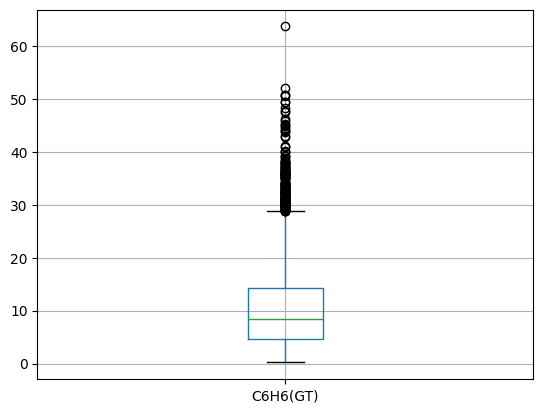

In [ ]:
air_quality_df.boxplot(column = 'C6H6(GT)')

## Grid Search Algorithm
In the grid search algorithm, a grid search will be implemented to find the optimal value of c based off of the provided dataset.
### Just y
In the just y method, just the y values from the dataset are utilized. No other variables are included. Essentially, we're seeing how far away the observed value is away from a randomly created predicted value.

In [ ]:
#creating a grid of values for c (min = 0.2, max = 63.7, Q1 = 4.6, Q3 = 14.3)
#grid (i.e. list) of values represents "predicted" values
grid = np.linspace(4.6, 14.3, 100)

In [4]:
def rmse(y_observed, c):
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for value in y_observed:
    squared_errors.append((value-c)**2)

  return np.sqrt((1/len(y_observed))*sum(squared_errors))

In [ ]:
#list comprehension to loop over grid of c values and find RMSE for each values of c, y here represents a list of the observed values
rmse_values = [rmse(y, c) for c in grid]

#determine the predicted value that shows the lowest RMSE value
optimal_c = grid[rmse_values.index(min(rmse_values))]
print(optimal_c)

NameError: name 'y' is not defined

In [5]:
#wrapped function that takes in a column of data and outputs the optimal value of c
def grid_search_y(data: pd.Series):
  #create a grid of c values based on the first and third quartile of the data passed in
  grid = np.linspace(data.quantile(0.25), data.quantile(0.75), 100)
  #list comprehension to loop over grid of c values and find RMSE for each values of c, y here represents a list of the observed values
  rmse_values = [rmse(data, c) for c in grid]

  #determine the predicted value that shows the lowest RMSE value
  optimal_c = grid[rmse_values.index(min(rmse_values))]
  return optimal_c


In [6]:
grid_search_y(air_quality_df['C6H6(GT)'])

np.float64(10.282828282828284)

### Using y and another numeric variable
In the code below, a grid search will be utilized to find the optimal pair of values for the y-intercept (b0) and the slope (b1). In this approach, for each observation, the prediction is given by c = b0 +b1*x.

In [7]:
def rmse_yx(y_observed : pd.Series, x_observed : pd.Series, b0, b1):
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for x, y in zip(x_observed, y_observed):
    squared_errors.append((y - (b0-b1*x))**2)

  return np.sqrt((1/len(y_observed))*sum(squared_errors))

def predicted_c(x,b0,b1):
  return b0+(b1*x)

def grid_search_yx(x_data : pd.Series, y_data : pd.Series):

  #define grid for b0 and b1 values
  grid_b0 = np.arange(-25,-15, 0.1)
  grid_b1 = np.arange(-5, 5, 0.01)

  #create empty dictionary to hold rmse values and corresponding b0 and b1 values
  c_rmse = {}

  for b0 in grid_b0:
    for b1 in grid_b1:
      rmse = rmse_yx(y_data, x_data, b0, b1)
      #store rmse value in dictionary along with corresponding b0 and b1 values
      c_rmse[rmse] = [b0,b1]

  min_c = min(c_rmse)
  optimal_b0 = c_rmse[min_c][0]
  optimal_b1 = c_rmse[min_c][1]

  return [optimal_b0,optimal_b1]

In [ ]:
optimal_b_values = grid_search_yx(air_quality_df['PT08.S1(CO)'], air_quality_df['C6H6(GT)'])

In [ ]:
optimal_b_values

[np.float64(-22.99999999999997), np.float64(-0.030000000000105942)]

In [11]:
optimal_b_values_saved = np.array([-23,-0.03])

In [13]:
c6h6_1 = optimal_b_values_saved[0] - optimal_b_values_saved[1]*946
c6h6_2 = optimal_b_values_saved[0] - optimal_b_values_saved[1]*1075
c6h6_3 = optimal_b_values_saved[0] - optimal_b_values_saved[1]*1246
print(c6h6_1, c6h6_2, c6h6_3)

5.379999999999999 9.25 14.379999999999995


##Gradient Decsent Algorithm
###Just y

In [30]:
#root mean squared error function
def rmse(y : pd.Series, c : float):
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for value in y:
    squared_errors.append((value-c)**2)

  return np.sqrt((1/len(y))*sum(squared_errors))

#difference quotient function
def difference_quotient(y : pd.Series, c : float, delta : float):
  return (rmse(y,c+delta)-rmse(y,c))/delta

#main gradient_descent_loop
def gradient_descent_y(data : pd.Series, start_c : float, step_size : float, delta : float, num_tol : float):

  #conduct intital "iteration" of moving c so that you have a value to check when starting the while loop
  #set the current c as the starting c passed to the function
  curr_c = start_c
  #calculate difference quotient
  dq = difference_quotient(data, curr_c, delta)
  #update the value of c based on the difference quotient and the step size
  new_c = curr_c - (dq*step_size)
  #create a counter to keep track of the number of loop iterations
  loop_counter = 0

  #start while loop and initially check if the new_c-curr_c meets criteria
  while(abs(new_c-curr_c) > num_tol):
    loop_counter += 1
    #set the current_c to be new c value just calculated
    curr_c = new_c
    #calculate the difference quotient for the current value of c
    dq = difference_quotient(data, curr_c, delta)
    #update the value of c based on the difference quotient and the step size
    new_c = curr_c - (dq*step_size)

    if loop_counter > 10000:
      print('Exceeded 10000 Limit')
      break

  return new_c, loop_counter


In [31]:
c, loop_count = gradient_descent_y(air_quality_df['C6H6(GT)'], 0, 0.01, 0.001, 0.0001)

Streaming output truncated to the last 5000 lines.
difference: 0.0005355477285995391
curr_c_2: 9.876720610042824
dq_2: -0.05348310508068721
new_c: 9.87725544109363
difference: 0.0005348310508068721
curr_c_2: 9.87725544109363
dq_2: -0.05341153242977015
new_c: 9.877789556417929
difference: 0.0005341153242977015
curr_c_2: 9.877789556417929
dq_2: -0.05334005464252556
new_c: 9.878322956964354
difference: 0.0005334005464252556
curr_c_2: 9.878322956964354
dq_2: -0.05326867181754125
new_c: 9.87885564368253
difference: 0.0005326867181754125
curr_c_2: 9.87885564368253
dq_2: -0.05319738360665127
new_c: 9.879387617518596
difference: 0.0005319738360665127
curr_c_2: 9.879387617518596
dq_2: -0.053126189924590506
new_c: 9.879918879417842
difference: 0.0005312618992459051
curr_c_2: 9.879918879417842
dq_2: -0.053055090897480284
new_c: 9.880449430326816
difference: 0.0005305509089748028
curr_c_2: 9.880449430326816
dq_2: -0.052984086149621135
new_c: 9.880979271188313
difference: 0.0005298408614962113
curr

In [33]:
print(c)
print(loop_count)

10.200993520077164
3965


In [34]:
c, loop_count = gradient_descent_y(air_quality_df['PT08.S1(CO)'], 1100, 0.1, 0.001, 0.0001)

Streaming output truncated to the last 5000 lines.
difference: 0.00017712807220959803
curr_c_2: 1110.1931031075876
dq_2: -0.0017704703623167006
new_c: 1110.1932801546238
difference: 0.00017704703623167006
curr_c_2: 1110.1932801546238
dq_2: -0.0017696606846584473
new_c: 1110.1934571206923
difference: 0.00017696606846584473
curr_c_2: 1110.1934571206923
dq_2: -0.0017688517175429297
new_c: 1110.1936340058642
difference: 0.0001768851718679798
curr_c_2: 1110.1936340058642
dq_2: -0.0017680420967280952
new_c: 1110.193810810074
difference: 0.00017680420978649636
curr_c_2: 1110.193810810074
dq_2: -0.0017672342949026643
new_c: 1110.1939875335033
difference: 0.0001767234293765796
curr_c_2: 1110.1939875335033
dq_2: -0.0017664263509686862
new_c: 1110.1941641761384
difference: 0.00017664263509686862
curr_c_2: 1110.1941641761384
dq_2: -0.0017656174691182969
new_c: 1110.1943407378853
difference: 0.0001765617469118297
curr_c_2: 1110.1943407378853
dq_2: -0.0017648104915224394
new_c: 1110.1945172189344
di

In [35]:
print(c)
print(loop_count)

1110.3616956694855
8482


###Using y and another numeric variable

In [54]:
#root mean squared error function
def rmse(x_observed : pd.Series, y_observed : pd.Series, b0 : float, b1 : float):
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for x, y in zip(x_observed, y_observed):
    squared_errors.append((y - (b0-b1*x))**2)

  return np.sqrt((1/len(y_observed))*sum(squared_errors))

#difference quotient function for b0
def difference_quotient_b0(x : pd.Series, y : pd.Series, b0 : float, b1: float, delta : float):
  return (rmse(x,y,b0+delta,b1)-rmse(x,y,b0,b1))/delta

#different quotient function for b1
def difference_quotient_b1(x : pd.Series, y : pd.Series, b0 : float, b1: float, delta : float):
  return (rmse(x,y,b0,b1+delta)-rmse(x,y,b0,b1))/delta

def gradient_descent_yx(x_data : pd.Series, y_data : pd.Series, start_b0 : float, start_b1: float, step_size_b0 : float, step_size_b1 : float, delta : float, num_tol : float):
  curr_b0 = start_b0
  curr_b1 = start_b1

  dq_b0 = difference_quotient_b0(x_data, y_data, curr_b0, curr_b1, delta)
  new_b0 = curr_b0 - (dq_b0*step_size_b0)

  dq_b1 = difference_quotient_b1(x_data, y_data, new_b0, curr_b1, delta)
  new_b1 = curr_b1 - (dq_b1*step_size_b1)

  distance = np.linalg.norm(np.array([new_b0, new_b1]) - np.array([curr_b0, curr_b1]))

  loop_counter = 0

  while(distance > num_tol):
    loop_counter+=1

    curr_b0 = new_b0
    curr_b1 = new_b1

    dq_b0 = difference_quotient_b0(x_data, y_data, curr_b0, curr_b1, delta)
    new_b0 = curr_b0 - (dq_b0*step_size_b0)

    dq_b1 = difference_quotient_b1(x_data, y_data, new_b0, curr_b1, delta)
    new_b1 = curr_b1 - (dq_b1*step_size_b1)

    distance = np.linalg.norm(np.array([new_b0, new_b1]) - np.array([curr_b0, curr_b1]))

    if loop_counter > 100000:
      print('Exceeded 100000 Limit')
      break

  return [new_b0, new_b1]

In [ ]:
optimal_b_values = gradient_descent_yx(x_data = air_quality_df['PT08.S1(CO)'], y_data = air_quality_df['C6H6(GT)'], start_b0 = -20, start_b1 = 0, step_size_b0 = 0.5, step_size_b1 = 0.00005, delta = 0.005, num_tol = 0.0001)